#### Import

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import calendar
from datetime import datetime
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# directory
%cd '/content/gdrive/My Drive/Oxford/ML_for_Social_Good'
# import
df = pd.read_csv("preprocessed_with_outlier_classif.csv")

Mounted at /content/gdrive
/content/gdrive/My Drive/Oxford/ML_for_Social_Good


In [3]:
df2 = df.drop(columns=["ID","Set","Yield","Yield_per_Acre"])

#### Note: can't do PCA with missing values, so adding a pass over the remaining NaNs for PCA purposes

In [4]:
# Adding binary variables encoding whether the value was missing (for variables where NaNs mean non-applicable) before imputing
df["1appDaysUrea_isNA"] = False
df.loc[df["1appDaysUrea"].isnull()==True, "1appDaysUrea_isNA"] = True

df["2appDaysUrea_isNA"] = False
df.loc[df["2appDaysUrea"].isnull()==True, "2appDaysUrea_isNA"] = True

df["Days_bw_Nurs_SowTransp_isNA"] = False
df.loc[df["Days_bw_Nurs_SowTransp"].isnull()==True, "Days_bw_Nurs_SowTransp_isNA"] = True

df["StandingWater_isNA"] = False
df.loc[df["StandingWater"].isnull()==True, "StandingWater_isNA"] = True

df["SeedlingsPerPit_isNA"] = False
df.loc[df["SeedlingsPerPit"].isnull()==True, "SeedlingsPerPit_isNA"] = True

# Imputation -- might not be the best strategy, but for now:
df2["1appDaysUrea"] = df2["1appDaysUrea"].fillna(df2["1appDaysUrea"].max()) # filling with max value
df2["2appDaysUrea"] = df2["2appDaysUrea"].fillna(df2["2appDaysUrea"].max()) # filling with max value
df2["Days_bw_Nurs_SowTransp"] = df2["Days_bw_Nurs_SowTransp"].fillna(0) # filling with 0
df2["StandingWater"] = df2["StandingWater"].fillna(df2["StandingWater"].median()) # filling with median
df2["SeedlingsPerPit"] = df2["SeedlingsPerPit"].fillna(df2["SeedlingsPerPit"].median()) # filling with median

#### Selecting the number of components

In [5]:
pca = PCA(.999) # amount of variance we want the PCA to capture
pca.fit(df2)

PCA(copy=True, # whether a copy of the input data should be made
    iterated_power='auto', #  number of iterations for the power method
    n_components=0.999, # number of principal components to keep, or the fraction of variance to preserve
    random_state=0, # seed
    svd_solver='auto', # algorithm to use for the SVD (Singular Value Decomposition)
    tol=0.0, # tolerance for stopping the SVD solver
    whiten=False # whether to perform whitening
    )

print("Number of components required to maintain 99.9% of the variance: ", pca.n_components_)

Number of components required to maintain 99.9% of the variance:  86


In [6]:
print("Number of columns before PCA: ", df2.shape[1])

Number of columns before PCA:  129


- Number of components required to maintain **97%** of the variance:  45
- Number of components required to maintain **99%** of the variance:  60
- Number of components required to maintain **99.5%** of the variance:  68
- Number of components required to maintain **99.9%** of the variance:  85

#### Transforming

In [7]:
pca_results = pca.transform(df2)
pca_results = pd.DataFrame(pca_results)

df_tomerge = df[["ID","Set","Yield","Yield_per_Acre"]]
pca_results = pd.concat([df_tomerge, pca_results],axis=1)
pca_results

,ID,Set,Yield,Yield_per_Acre,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
0,ID_GTFAC7PEVWQ9,train,600.0,1920.000000,-1.319264,0.717023,0.519331,-0.702642,-0.774784,1.324309,-1.551153,0.742929,0.064748,-1.221820,0.233071,-1.478218,-0.322481,-0.410895,-0.439366,-0.467189,-0.122332,-0.008328,-0.186853,0.073351,0.299191,0.466985,-0.065374,0.185183,-0.501846,-0.047048,0.370450,0.173126,0.080821,0.666481,-0.225908,0.473252,0.226627,-0.571085,0.302503,-0.063976,0.404511,-0.017897,-0.413716,0.247094,0.351435,-0.229765,-0.325283,0.261906,-0.057107,-0.103642,-0.330036,0.015647,-0.073431,0.096532,-0.128331,0.048594,-0.103086,0.189800,-0.136948,-0.000973,-0.161158,-0.038816,-0.079976,-0.155149,-0.099859,-0.009782,0.155318,-0.033783,0.105522,0.043456,-0.170655,0.010526,-0.065840,-0.008220,-0.015239,0.024832,-0.003413,0.075122,-0.013870,0.012579,0.011484,0.007834,0.010955,-0.127514,0.047474,-0.002632,-0.041833,0.047797,-0.050542,-0.032547
1,ID_TK40ARLSPOKS,train,600.0,1920.000000,-0.997713,1.861403,1.016174,-0.418773,-0.066015,-0.306823,-0.263496,0.064624,-0.223755,0.526322,-0.668062,-0.857653,-0.725502,0.240393,0.464143,-0.015602,-0.225033,-0.377312,-0.316682,-0.527403,-0.008293,-0.702338,-0.152479,0.074326,-0.369551,-0.005751,-0.576164,-0.193714,0.001646,-0.167683,-0.296098,-0.105295,0.030191,0.029653,-0.364464,-0.139970,0.098070,0.034889,0.006889,0.065560,-0.098257,0.015424,0.009212,-0.144629,-0.024549,-0.037286,0.009596,0.081202,-0.174388,0.025451,-0.082954,0.045638,0.095225,-0.035159,0.223276,0.035963,-0.085426,-0.008854,-0.048979,0.161978,0.009368,-0.083443,0.017853,0.027300,0.027834,0.035099,-0.034972,-0.021319,0.082226,-0.046310,0.007656,0.032128,-0.026260,-0.000971,0.015459,-0.012920,0.015017,-0.009522,-0.069578,-0.030490,-0.081836,0.039980,-0.004517,0.027822,-0.023167,0.040459
2,ID_1FJY2CRIMLZZ,train,225.0,1518.750000,0.996359,-0.056624,-0.585991,-0.451986,0.074352,-0.360395,-1.241196,-0.535761,0.898351,0.423212,-0.657207,1.587126,0.770458,-0.626972,-0.136922,-0.388188,-0.183420,-0.475202,-0.344297,0.883265,1.453740,-0.651613,0.511402,0.625554,1.286427,-0.278095,0.164072,0.124728,0.008212,0.704974,-0.405789,-0.929277,0.216288,-0.013281,0.425269,0.183107,-0.018213,0.030052,-0.333641,0.000299,-0.006002,-0.032176,-0.146946,-0.171305,0.024514,0.424144,0.427456,0.232863,-0.038973,0.006982,0.561965,-0.038818,0.122312,0.290911,-0.211716,0.188777,-0.097141,-0.145239,0.033146,-0.065889,0.091609,-0.043009,-0.183917,0.121712,-0.269634,-0.312571,-0.001129,0.350000,0.005241,0.111780,0.757165,0.270208,0.237876,0.157832,0.170108,-0.201190,-0.053393,0.053825,-0.008836,-0.142533,-0.243645,0.150383,0.076037,-0.053085,-0.009816,0.015356
3,ID_I3IPXS4DB7NE,train,468.0,2106.000000,0.097354,0.486956,-0.762647,-0.624392,0.659522,-0.460133,-0.961338,-0.214982,0.174694,0.767337,-0.899766,0.214839,0.510890,0.246156,-0.139802,0.708596,-0.567179,0.842473,-1.060045,-0.001030,0.155215,-0.259119,-0.284094,1.179491,0.300532,-0.338924,0.324342,0.726629,0.004598,0.422881,0.174209,-0.056094,-0.013129,-0.073684,0.007327,-0.507998,-0.071379,0.286729,0.283049,0.364892,-0.030021,0.330951,-0.085448,0.169451,-0.053426,-0.304986,0.119042,-0.235335,-0.127801,0.088858,0.062349,-0.052240,0.244011,0.368195,0.130081,0.030508,0.120470,-0.402903,-0.021773,-0.152385,-0.243044,0.111487,0.087034,-0.013796,0.058770,0.241060,-0.079766,0.043859,0.223882,0.127812,0.020141,0.028028,-0.001139,-0.157639,0.061334,0.022864,0.010511,-0.071520,0.002548,0.023686,0.100236,-0.005311,-0.051707,0.059003,-0.123257,0.117545
4,ID_4T8YQWXWHB4A,train,550.0,1173.333333,-2.141574,1.589559,0.944595,0.228530,-0.665393,0.521124,0.025437,0.649624,-0.297403,-0.308351,0.159178,-1.299158,-0.620832,0.067394,0.204950,-0.368019,-0.445068,0.185211,-0.011946,0.134003,-0.011244,0.374966,0.095780,0.239278,-0.030731,-0.1

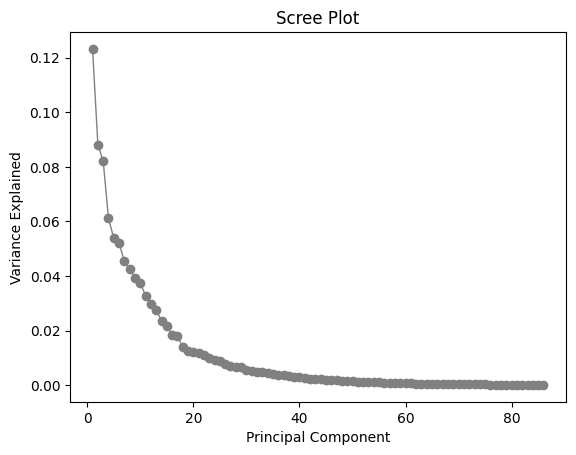

In [8]:
# Scree plot
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='grey')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#### Exporting the PCA-ed version of the df

In [9]:
pca_results.to_csv('pca_df.csv',index=False)